In [1]:
#Standard toolset
%matplotlib inline
from sklearn.metrics import r2_score

import numpy as np
import matplotlib.pyplot as plot

import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
df = pd.read_csv('flats.csv')
df.shape

(2310, 11)

In [3]:
df.describe()

,balcony,total_area,year,cost,lon,lat
count,1859.000000,2310.000000,2081.000000,2.310000e+03,2310.000000,2310.000000
mean,1.010758,36.169697,1997.595387,2.848634e+06,60.595955,56.823525
std,0.117804,7.792332,20.895129,9.269107e+05,0.060531,0.043765
min,1.000000,20.000000,1925.000000,7.800000e+05,60.407310,56.739841
25%,1.000000,31.000000,1977.000000,2.290000e+06,60.550942,56.790414
50%,1.000000,35.000000,2009.000000,2.680000e+06,60.601184,56.815863
75%,1.000000,40.000000,2015.000000,3.150000e+06,60.633243,56.856063
max,3.000000,106.000000,2019.000000,1.390000e+07,60.782653,56.958709


In [4]:
df = df[df.total_area >= 20]


In [5]:
numerical_fields = ['total_area','cost']

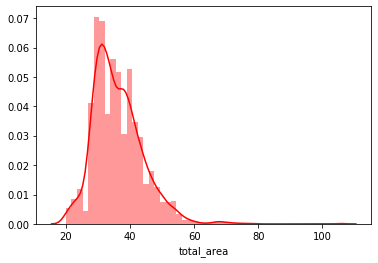

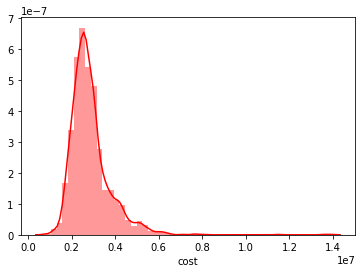

In [6]:
for col in numerical_fields:
    mask = ~np.isnan(df[col])
    sns.distplot(df[col][mask],  color="r",label=col)
    plot.show()



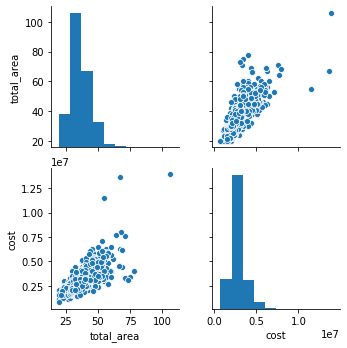

In [7]:
sns.pairplot(df[numerical_fields])

In [8]:
df = df[abs(df.total_area - df.total_area.mean()) <= (3 * df.total_area.std())]
df = df[abs(df.cost - df.cost.mean()) <= (3 * df.cost.std())]

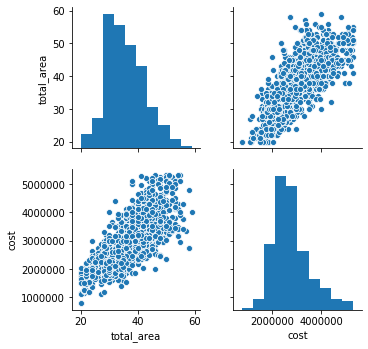

In [9]:
sns.pairplot(df[numerical_fields])

In [10]:
df.head()

,balcony,walls,total_area,district,year,cost,description,lon,lat,type_house,repair
0,1.0,Панельный,30,Уралмаш,1963.0,2250000,NaN,60.600987,56.890172,NaN,Хорошее
1,NaN,Кирпичный,32,Эльмаш,1959.0,2090000,"Продается отличная,теплая, уютная однокомнатна...",60.615153,56.884861,NaN,Хорошее
2,NaN,NaN,42,Ботанический,2017.0,2800000,Квартира с хорошим ремонтом.,60.615800,56.790526,NaN,В
3,1.0,NaN,29,Ю-З,NaN,2200000,"Продается светлая,теплая квартира в районе Бур...",60.572762,56.823636,NaN,NaN
4,1.0,Панельный,34,Компрессорный,2001.0,2000000,"Уютная, теплая, светлая однокомнатная квартира...",60.763187,56.796718,Улучшенной,Хорошее


In [11]:
df['age'] = 2019 -df['year']

In [12]:
flats_on_map = df[["lon","lat","cost"]]

In [13]:
flats_on_map.to_csv("on_map.csv",index=False)

In [14]:
df.drop(columns=["lon","lat","description"],inplace=True)

In [15]:
df.head()

,balcony,walls,total_area,district,year,cost,type_house,repair,age
0,1.0,Панельный,30,Уралмаш,1963.0,2250000,NaN,Хорошее,56.0
1,NaN,Кирпичный,32,Эльмаш,1959.0,2090000,NaN,Хорошее,60.0
2,NaN,NaN,42,Ботанический,2017.0,2800000,NaN,В,2.0
3,1.0,NaN,29,Ю-З,NaN,2200000,NaN,NaN,NaN
4,1.0,Панельный,34,Компрессорный,2001.0,2000000,Улучшенной,Хорошее,18.0


In [16]:
df.describe()

,balcony,total_area,year,cost,age
count,1824.000000,2261.000000,2038.00000,2.261000e+03,2038.00000
mean,1.010417,35.675807,1997.29735,2.779700e+06,21.70265
std,0.116641,6.918724,21.00202,7.488420e+05,21.00202
min,1.000000,20.000000,1925.00000,7.800000e+05,0.00000
25%,1.000000,31.000000,1977.00000,2.280000e+06,4.00000
50%,1.000000,35.000000,2008.00000,2.650000e+06,11.00000
75%,1.000000,40.000000,2015.00000,3.100000e+06,42.00000
max,3.000000,59.000000,2019.00000,5.300000e+06,94.00000


# Fill empty values

In [17]:
df.head()

,balcony,walls,total_area,district,year,cost,type_house,repair,age
0,1.0,Панельный,30,Уралмаш,1963.0,2250000,NaN,Хорошее,56.0
1,NaN,Кирпичный,32,Эльмаш,1959.0,2090000,NaN,Хорошее,60.0
2,NaN,NaN,42,Ботанический,2017.0,2800000,NaN,В,2.0
3,1.0,NaN,29,Ю-З,NaN,2200000,NaN,NaN,NaN
4,1.0,Панельный,34,Компрессорный,2001.0,2000000,Улучшенной,Хорошее,18.0


In [18]:
df.shape

(2261, 9)

# Transformation

In [19]:
district_map = {'автовокзал': 1, 'академический': 2, 'березит': 4,
                'ботанический': 2, 'верхнемакарово': 4, 'виз': 1,
                'вокзальный': 1, 'втузгородок': 1, 'горный щит': 4,
                'елизавет': 3, 'жби': 2, 'завокзальный': 3, 'заречный': 1,
                'изоплит': 4, 'исток': 4, 'калиновский': 4, 'карасьеозерск': 2,
                'кольцово': 4, 'компрессорный': 3, 'лечебный': 3,
                'малый исток': 4, 'медный': 4, 'н.сортировка': 2,
                'нижнеисетский': 4, 'палкин.торфяник': 4, 'палкино': 4,
                'палникс': 2, 'парковый': 1, 'пионерский': 1, 'полеводство': 4,
                'птицефабрика': 4, 'рудный': 4, 'с.сортировка': 3, 'садовый': 4,
                'северка': 4, 'семь ключей': 4, 'сибирский': 2,
                'синие камни': 2, 'совхоз': 3, 'солнечный': 3,
                'сулим.торфяник': 4, 'технопарк': 4, 'уктус': 2, 'унц': 3,
                'уралмаш': 2, 'химмаш': 3, 'центр': 0, 'чермет': 3,
                'чусовское озеро': 4, 'шабровский': 4, 'шарташ': 4,
                'шарташский р-к': 1, 'широкая речка': 2, 'шувакиш': 4,
                'эльмаш': 2, 'ю-з': 1}

df.district = df.district.str.lower()
df.replace({"district": district_map}, inplace=True)

In [20]:
repair = {'В': 1,
          'Требует': 0.6,
          'Косметический': 0.7,
          'Хорошее': 0.8}
df.repair.fillna('Косметический', inplace=True)
df.replace({"repair": repair}, inplace=True)

In [21]:
walls_map = {'Кирпичный': 1.0,
             'Кирпич': 1.0,
             'Блочный': 0.8,
             'Монолитный': 0.9,
             'Деревянный': 0.4,
             'Панельный': 0.8,
             'Шлакоблочный': 0.6,
             'Газозолоблоки': 0.9,
             'Твин-блоки': 0.9,
             'Твинблоки': 0.9,
             'Пенозолобетон': 0.9,
             'Бетонные': 0.8,
             'Другой': 0.8,
             'Железобетон': 0.8}
mask = df[df['walls'].isna()][df.year >= 2010].index
df.loc[mask, 'walls'] = 'Газозолоблоки'
mask = df[df['walls'].isna()][df.year >= 2000].index
df.loc[mask, 'walls'] = 'Бетонные'
mask = df[df['walls'].isna()][df.year >= 1990].index
df.loc[mask, 'walls'] = 'Панельный'
mask = df[df['walls'].isna()].index
df.loc[mask, 'walls'] = 'Шлакоблочный'

df.replace({"walls": walls_map}, inplace=True)
df.drop(columns=['year'],inplace=True)

In [22]:
df.balcony.fillna(0,inplace=True)

In [23]:
df.describe()

,balcony,total_area,district,cost,repair,age
count,2261.000000,2261.000000,2261.000000,2.261000e+03,2261.000000,2038.00000
mean,0.815126,35.675807,1.804069,2.779700e+06,0.806325,21.70265
std,0.412591,6.918724,0.855022,7.488420e+05,0.139277,21.00202
min,0.000000,20.000000,0.000000,7.800000e+05,0.600000,0.00000
25%,1.000000,31.000000,1.000000,2.280000e+06,0.700000,4.00000
50%,1.000000,35.000000,2.000000,2.650000e+06,0.800000,11.00000
75%,1.000000,40.000000,2.000000,3.100000e+06,1.000000,42.00000
max,3.000000,59.000000,4.000000,5.300000e+06,1.000000,94.00000


In [24]:

df.drop(columns=['type_house'],inplace=True)
df = df.astype(np.float64)
df.dropna(inplace=True)

In [25]:
df.describe()

,balcony,walls,total_area,district,cost,repair,age
count,2038.000000,2038.000000,2038.000000,2038.000000,2.038000e+03,2038.000000,2038.00000
mean,0.823847,0.905839,35.800294,1.795388,2.799436e+06,0.808832,21.70265
std,0.408405,0.087176,6.954855,0.851715,7.524326e+05,0.140238,21.00202
min,0.000000,0.400000,20.000000,0.000000,7.800000e+05,0.600000,0.00000
25%,1.000000,0.800000,31.000000,1.000000,2.300000e+06,0.700000,4.00000
50%,1.000000,0.900000,35.000000,2.000000,2.680000e+06,0.800000,11.00000
75%,1.000000,1.000000,40.000000,2.000000,3.116000e+06,1.000000,42.00000
max,3.000000,1.000000,59.000000,4.000000,5.300000e+06,1.000000,94.00000


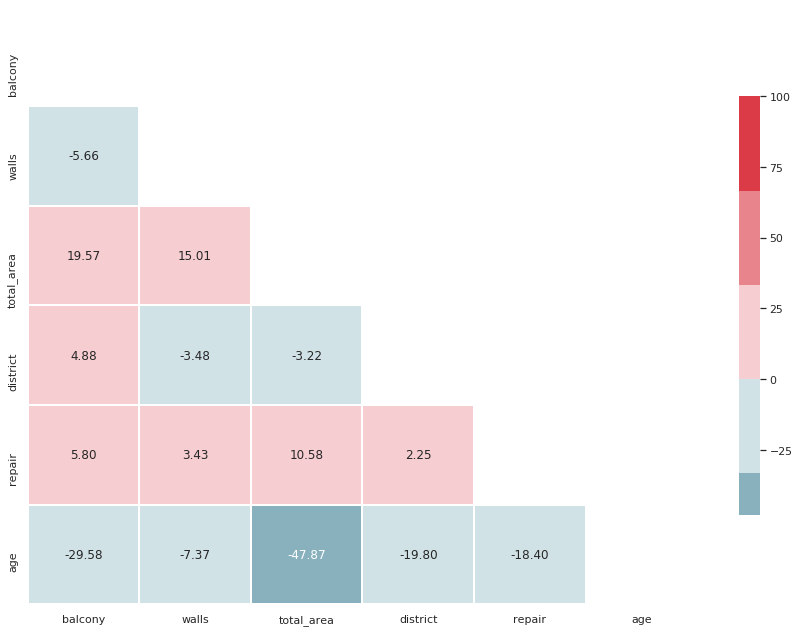

In [26]:
def show_correlation(df):
    sns.set(style="whitegrid")
    corr = df.corr() * 100

    # Select upper triangle of correlation matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 11))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
                linewidths=1, cbar_kws={"shrink": .7}, annot=True,
                fmt=".2f")
    plot.show()
    # df[columns] = scale(df[columns])
    return df
df1 = show_correlation(df.drop(columns=['cost']))

In [27]:
df['total_area'].values

array([30., 32., 42., ..., 44., 45., 40.])

In [28]:
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
chi2_contingency(df['total_area'], df['district'])

(0.0, 1.0, 0, array([30., 32., 42., ..., 44., 45., 40.]))

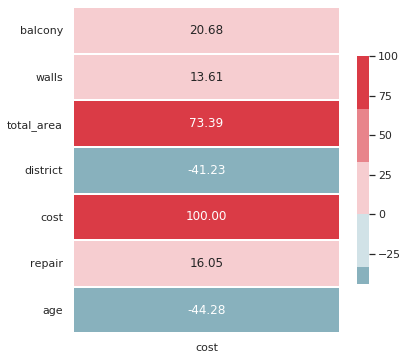

In [29]:
plt.figure(figsize=(6,6))
corr = df.corr()*100.0
sns.heatmap(corr[['cost']],
            cmap= sns.diverging_palette(220, 10),
            center=0,
            linewidths=1, cbar_kws={"shrink": .7}, annot=True,
            fmt=".2f")

In [30]:
corr[['cost']]

,cost
balcony,20.679068
walls,13.607172
total_area,73.391879
district,-41.234944
cost,100.000000
repair,16.053086
age,-44.282268


In [31]:
from sklearn.model_selection import train_test_split 


y = df.cost
X = df.drop(columns=['cost'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive predict

In [32]:
X.describe()



,balcony,walls,total_area,district,repair,age
count,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.00000
mean,0.823847,0.905839,35.800294,1.795388,0.808832,21.70265
std,0.408405,0.087176,6.954855,0.851715,0.140238,21.00202
min,0.000000,0.400000,20.000000,0.000000,0.600000,0.00000
25%,1.000000,0.800000,31.000000,1.000000,0.700000,4.00000
50%,1.000000,0.900000,35.000000,2.000000,0.800000,11.00000
75%,1.000000,1.000000,40.000000,2.000000,1.000000,42.00000
max,3.000000,1.000000,59.000000,4.000000,1.000000,94.00000


In [33]:

def predict(X, y_test, model):
    y = model.predict(X)
    score = round((r2_score(y_test, y) * 100), 2)
    print(f'Score on {model.__class__.__name__} is {score}')
    return score

def train_model(X, y, regressor):
    model = regressor.fit(X, y)
    return model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model = train_model(X_train, y_train, regressor)
predict(X_test, y_test, model)

Score on LinearRegression is 76.67


76.67

In [34]:
def do_cross_validation(X, y, model):
    from sklearn.model_selection import KFold, cross_val_score
    regressor_name = model.__class__.__name__
    fold = KFold(n_splits=10, shuffle=True, random_state=0)
    scores_on_this_split = cross_val_score(estimator=model, X=X,
                                           y=y, cv=fold, scoring='r2')
    scores_on_this_split = np.round(scores_on_this_split * 100, 2)

    mean_accuracy = scores_on_this_split.mean()
    print(f'Crossvaladaion accuracy on {model.__class__.__name__} is {mean_accuracy}')
    return mean_accuracy
do_cross_validation(X, y, model)

Crossvaladaion accuracy on LinearRegression is 73.32300000000001


73.32300000000001

In [35]:
df.describe()

,balcony,walls,total_area,district,cost,repair,age
count,2038.000000,2038.000000,2038.000000,2038.000000,2.038000e+03,2038.000000,2038.00000
mean,0.823847,0.905839,35.800294,1.795388,2.799436e+06,0.808832,21.70265
std,0.408405,0.087176,6.954855,0.851715,7.524326e+05,0.140238,21.00202
min,0.000000,0.400000,20.000000,0.000000,7.800000e+05,0.600000,0.00000
25%,1.000000,0.800000,31.000000,1.000000,2.300000e+06,0.700000,4.00000
50%,1.000000,0.900000,35.000000,2.000000,2.680000e+06,0.800000,11.00000
75%,1.000000,1.000000,40.000000,2.000000,3.116000e+06,1.000000,42.00000
max,3.000000,1.000000,59.000000,4.000000,5.300000e+06,1.000000,94.00000


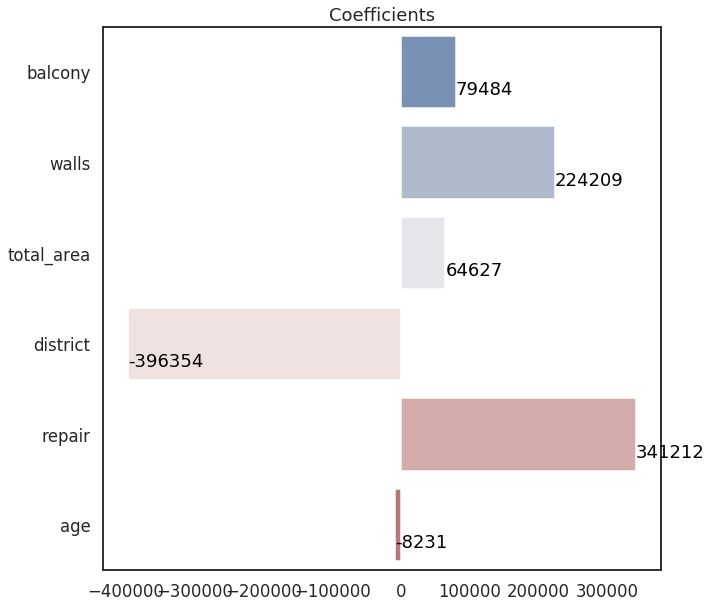

In [36]:
def estimate_model(model):
    
    sns.set(style="white", context="talk")
    f, ax = plot.subplots(1, 1, figsize=(10, 10), sharex=True)
    sns.barplot(x=model.coef_, y=X.columns, palette="vlag", ax=ax)
    for i, v in enumerate(model.coef_.astype(int)):
        ax.text(v + 3, i + .25, str(v), color='black')

    ax.set_title(f"Coefficients")
estimate_model(regressor)